In [1]:
# import packages
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from PIL import Image
from pandas import read_csv
from scipy.signal import argrelextrema
import os

plots_dir = os.path.abspath('./../../plots/north/vorf')
figs_dir = os.path.abspath('./../../figures')

h2_vorf = fits.open('h2_vorf.fits', ignore_missing_end=True)[0].data
h3p_vorf = fits.open('h3p_vorf.fits', ignore_missing_end=True)[0].data
h2_verr = fits.open('h2_vorf_err.fits', ignore_missing_end=True)[0].data
h3p_verr = fits.open('h3p_vorf_err.fits', ignore_missing_end=True)[0].data
h2_int = fits.open('h2_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_int = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
ref_sun = fits.open('ref_sun.fits', ignore_missing_end=True)[0].data

cmlsel = read_csv('cml-sel.txt', sep='\s+', header=None)
cml = cmlsel[3].to_numpy()
sel = cmlsel[4].to_numpy()

vmp = 3.41*np.sin((185-cml)*(np.pi/180))*np.cos((sel)*(np.pi/180))

h2_vorf[h2_verr > 4] = np.nan
h3p_vorf[h3p_verr > 4] = np.nan

h2_vorf[h2_vorf > 8] = np.nan
h3p_vorf[h3p_vorf > 8] = np.nan
h2_vorf[h2_vorf < -8] = np.nan
h3p_vorf[h3p_vorf < -8] = np.nan

h2_vorf[:,:20] = np.nan
h3p_vorf[:,:20] = np.nan
h2_vorf[:,280:] = np.nan
h3p_vorf[:,280:] = np.nan

h2_verr[np.isnan(h2_vorf)] = np.nan
h3p_verr[np.isnan(h3p_vorf)] = np.nan
h2_int[np.isnan(h2_vorf)] = np.nan
h3p_int[np.isnan(h3p_vorf)] = np.nan

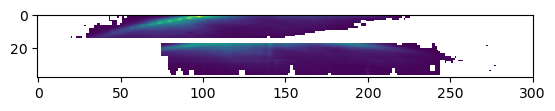

In [38]:
plt.imshow(h2_int)

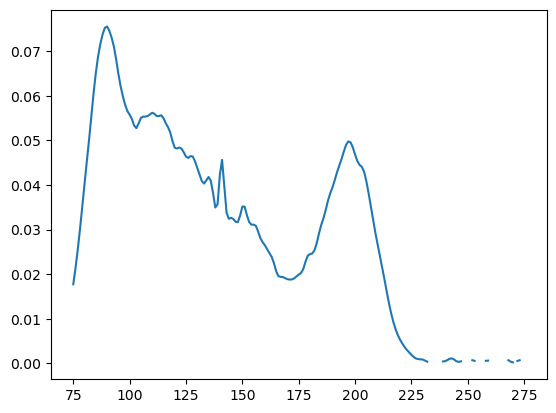

In [49]:
plt.plot(h2_int[19])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


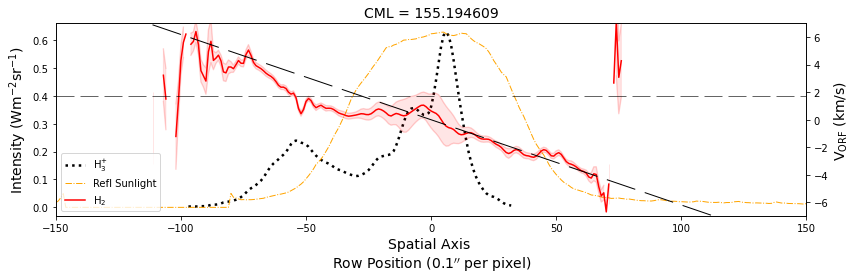

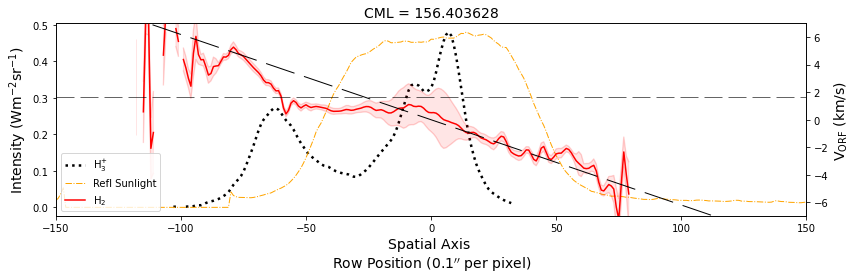

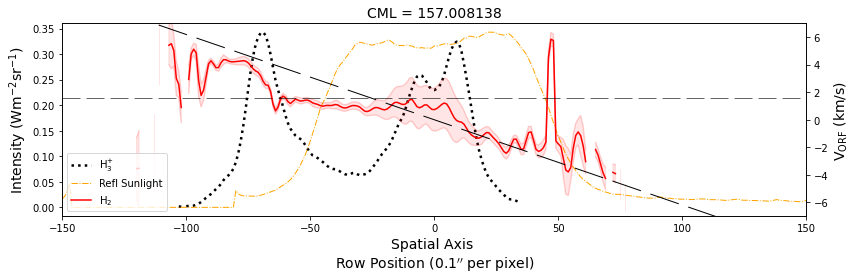

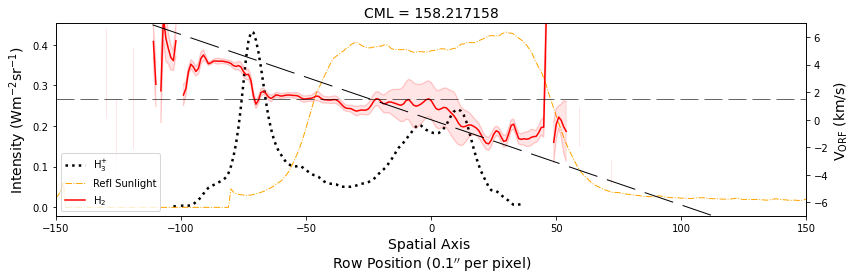

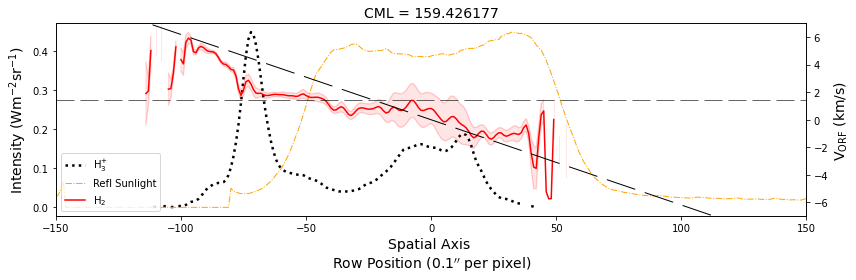

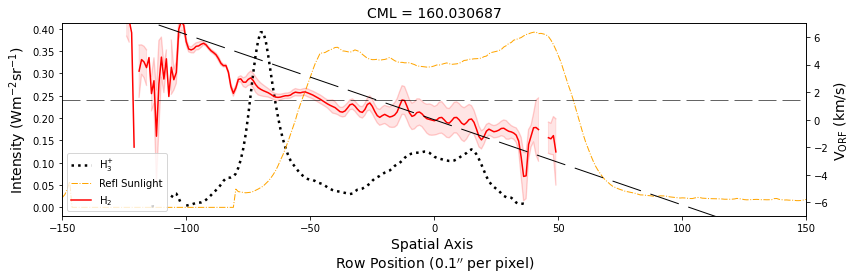

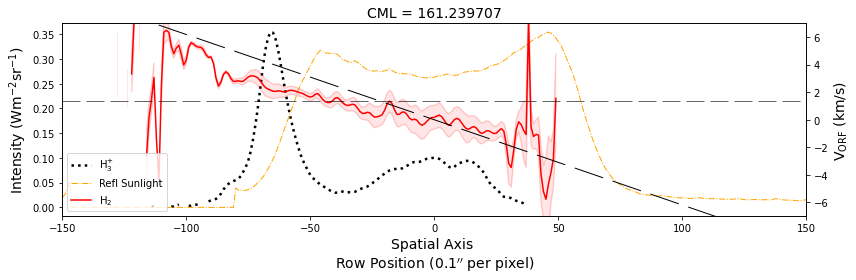

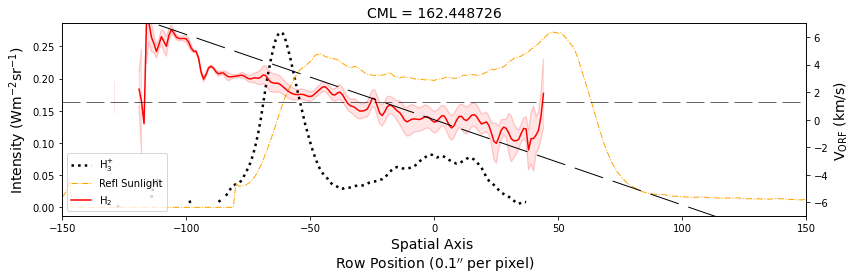

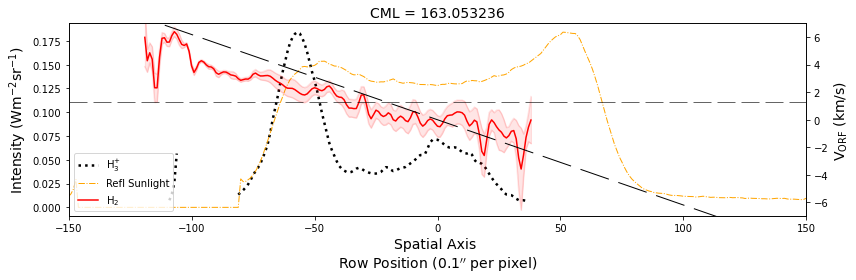

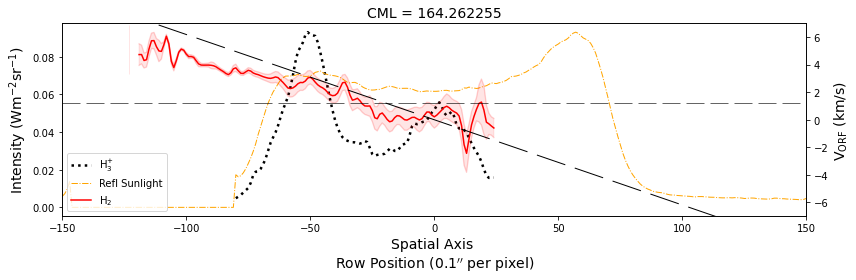

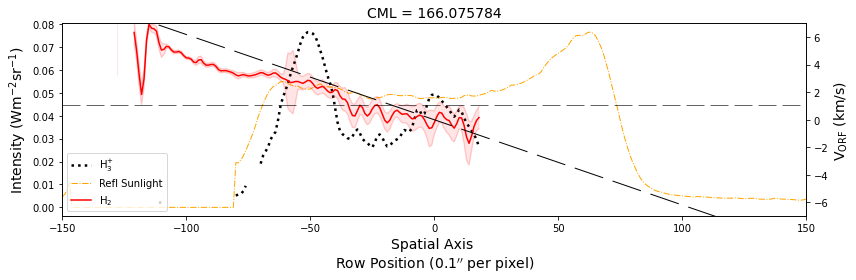

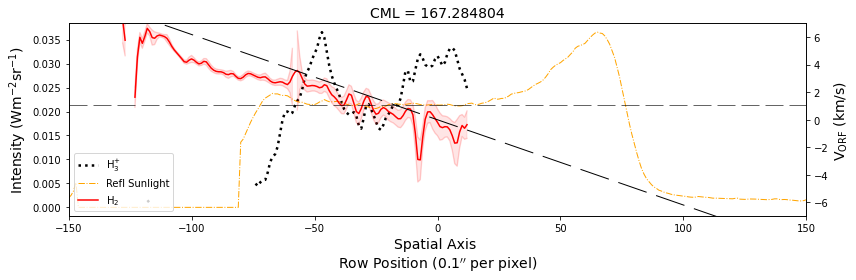

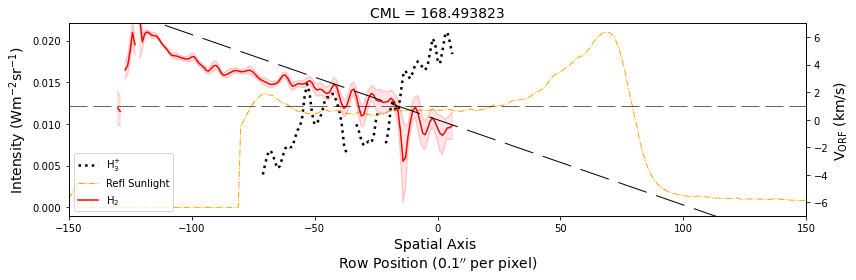

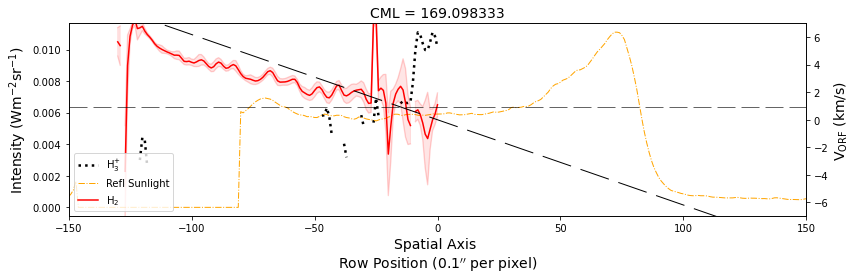

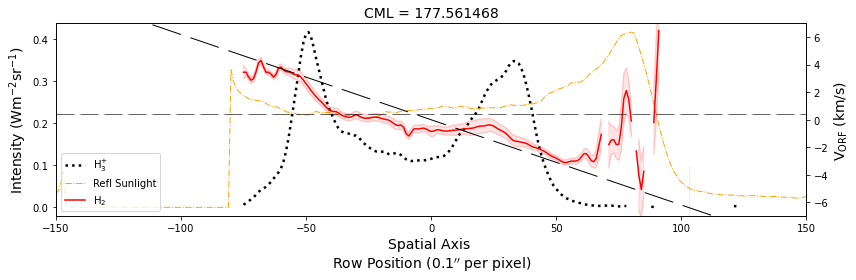

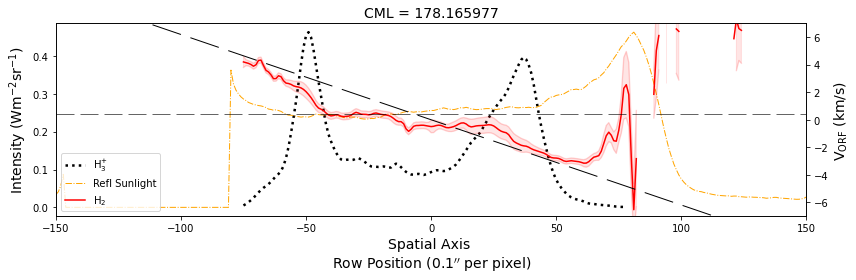

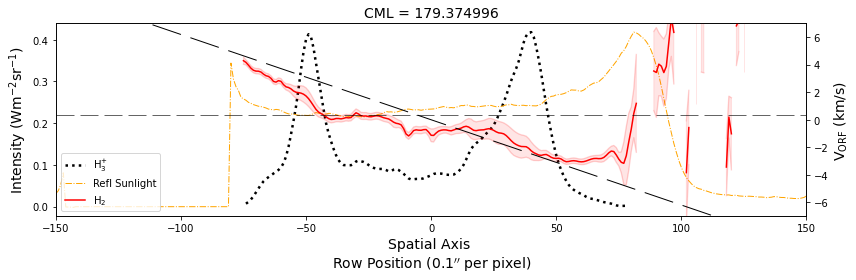

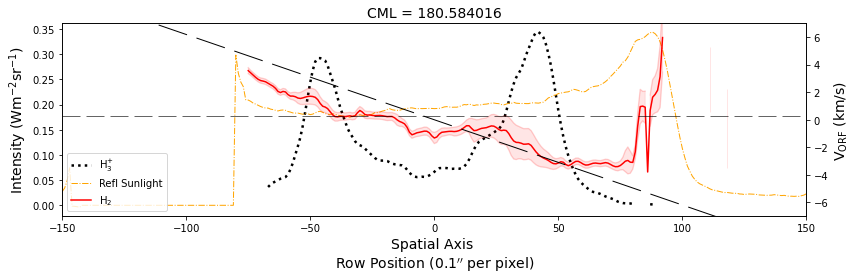

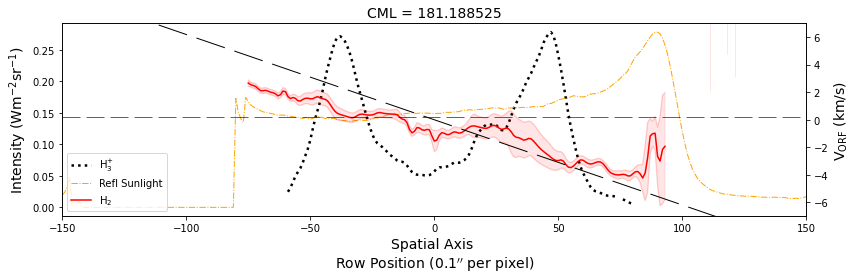

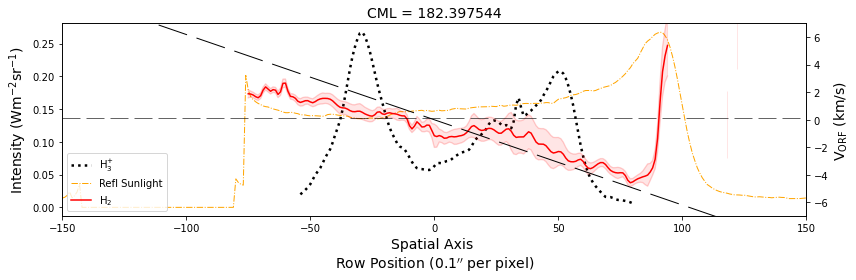

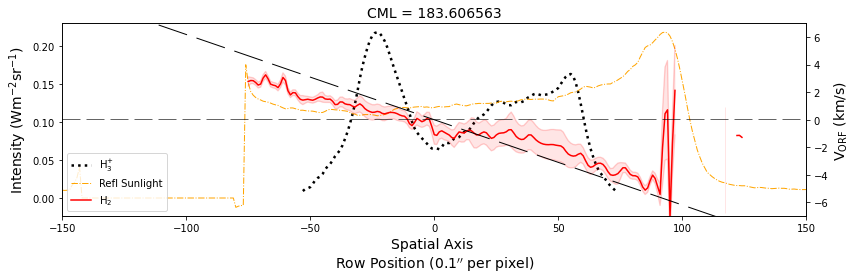

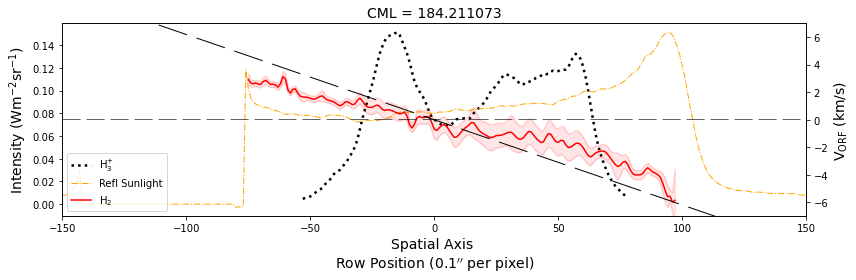

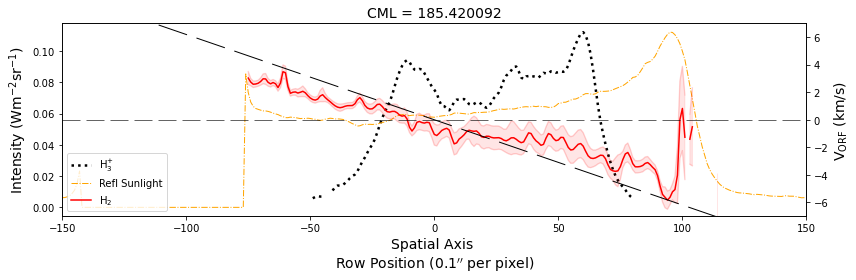

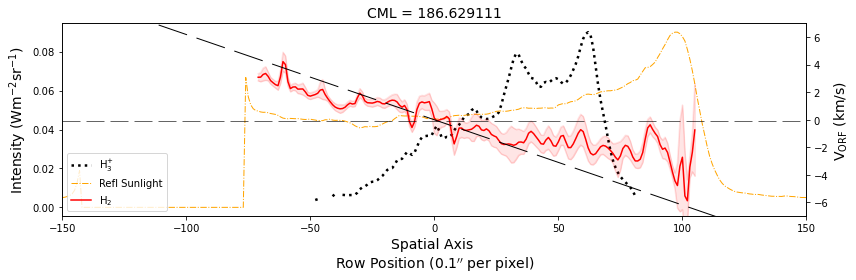

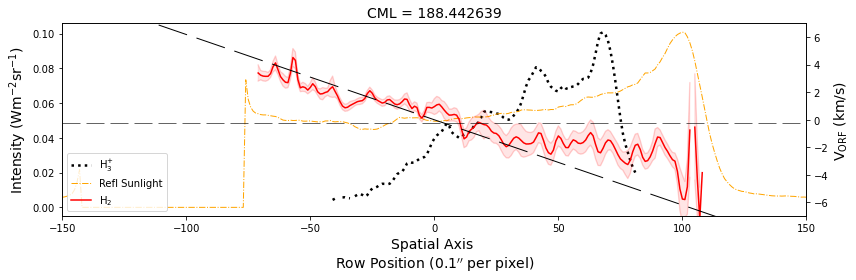

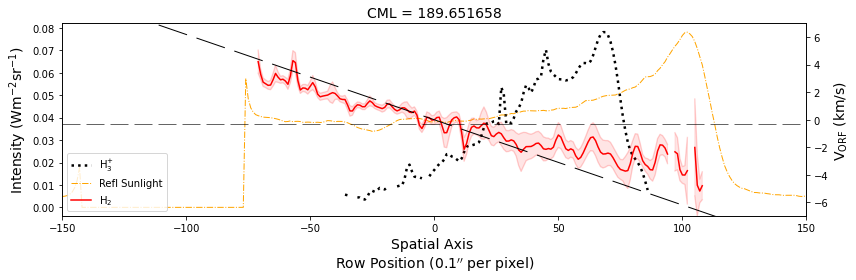

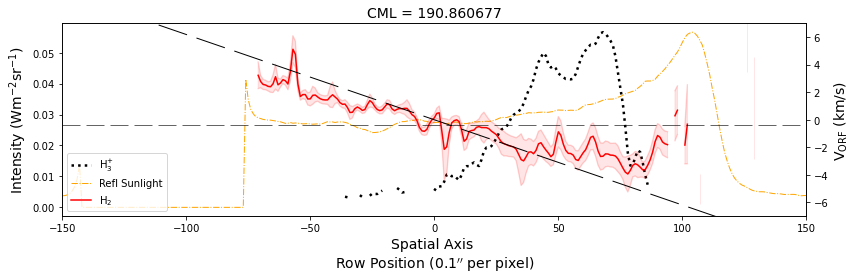

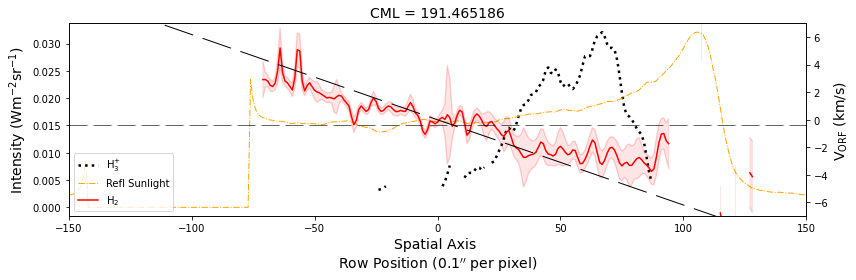

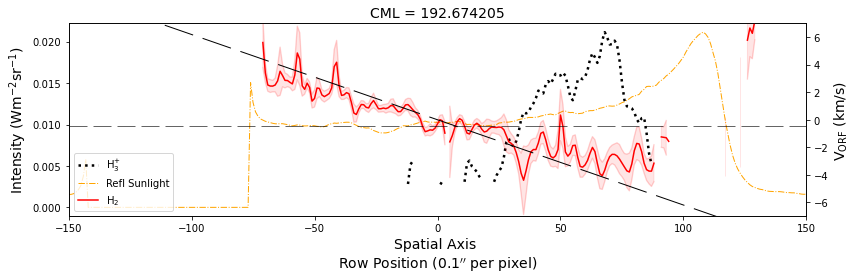

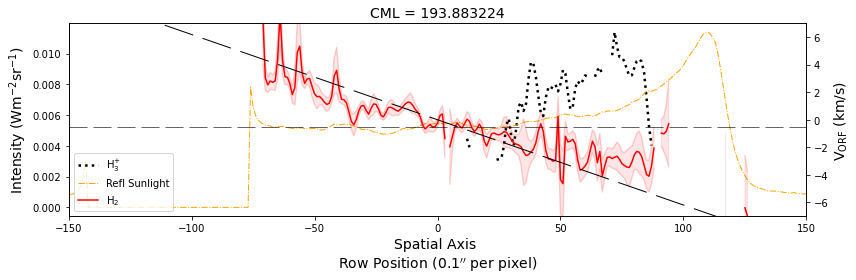

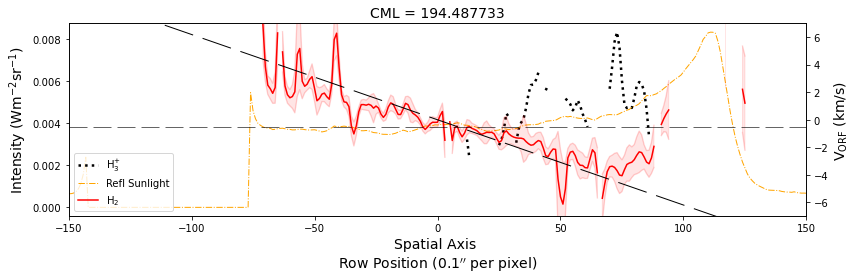

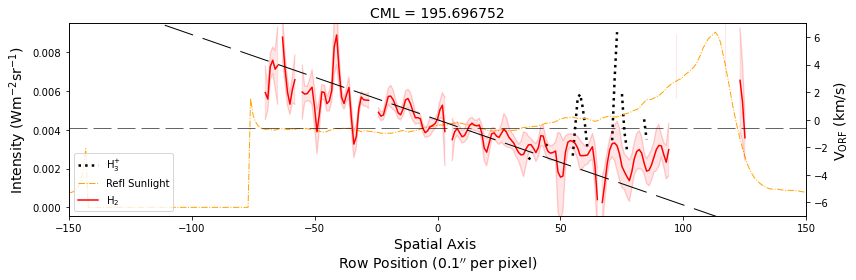

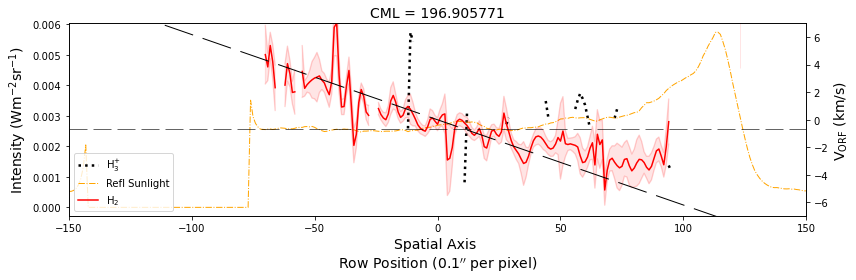

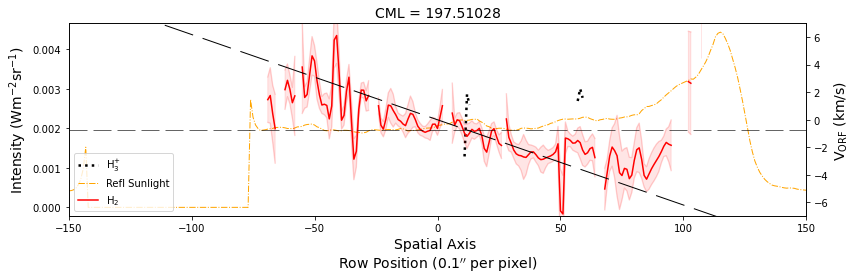

In [33]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

a2 = h2_vorf*(-1)
b2 = h3p_vorf*(-1)

c2 = b2 - a2

errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

for i in range(len(h3p_vorf)):
# for i in range(18, 19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-150,150,301)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vh2 = a2[i]
        vh2max = a2[i] + h2_verr[i]
        vh2min = a2[i] - h2_verr[i]
        
        vh3p = b2[i]
        vh3pmax = b2[i] + h3p_verr[i]
        vh3pmin = b2[i] - h3p_verr[i]
        
        ax2 = ax.twinx()
        
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        
        ax2.plot(xnew, vh2, color='red', label='H$_2$')        
        ax2.plot(xnew, vh2max, color='red', alpha=0.1)
        ax2.plot(xnew, vh2min, color='red', alpha=0.1)
        ax2.fill_between(xnew, vh2min, vh2max, color='red', alpha=0.1)
        
#         ax2.plot(xnew, vh3p, color='blue', label='H$_3^{+}$')
#         ax2.plot(xnew, vh3pmax, color='blue', alpha=0.1)
#         ax2.plot(xnew, vh3pmin, color='blue', alpha=0.1)
#         ax2.fill_between(xnew, vh3pmin, vh3pmax, color='blue', alpha=0.1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, (a2[i]-vmp[i])/vmp[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, (b2[i])/rot_rate, yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.plot(xnew, -rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=1)
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{ORF}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        plt.axhline(y=vmp[i], xmin=0, xmax=1, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(-150,150)
        plt.ylim(-7,7)
#         plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
#         plt.ylabel('V$_{\mathrm{orf}}$ (km/s)', fontsize=14)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=3)
#         
        plt.tight_layout()
        plt.savefig(plots_dir+'/h2_vorf_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

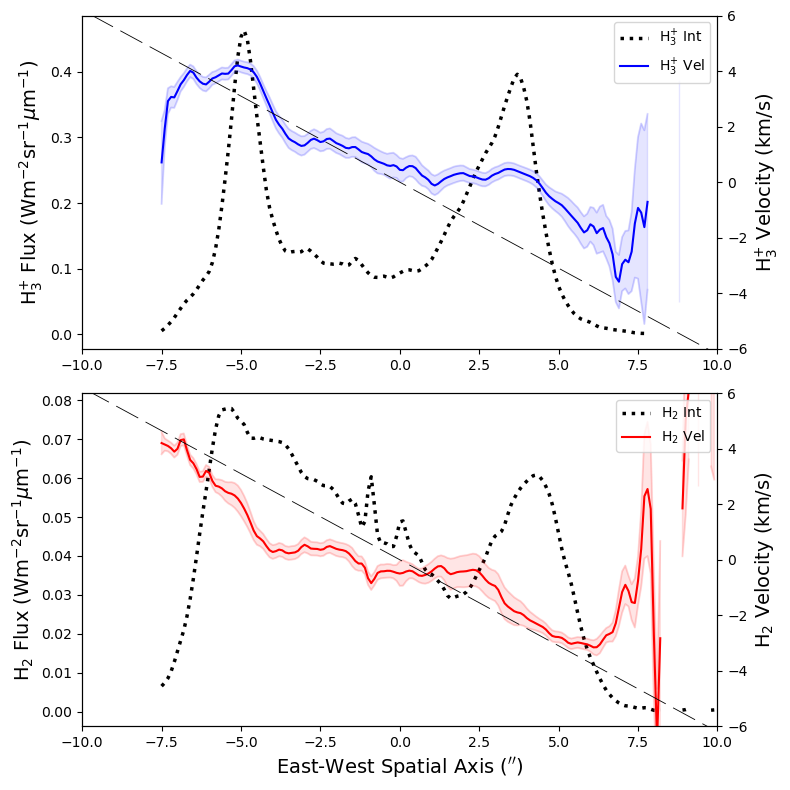

In [21]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(-150,150,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

a2 = h2_vorf*(-1)
b2 = h3p_vorf*(-1)

c2 = b2 - a2

errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

# for i in range(len(h3p_vorf)):
for i in range(18, 19):
    if i not in (0,15,16,37):  
        xnew = np.linspace(-15,15,301)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
#         fig, ax = plt.subplots(figsize = (8, 5))
        fig, ax = plt.subplots(2,1,figsize = (8, 8))
#         fig.add_subplot(211)
#         plt.title('CML = '+ str(cml[i]), fontsize=14)
        
        vh2 = a2[i]
        vh2max = a2[i] + h2_verr[i]
        vh2min = a2[i] - h2_verr[i]
        
        vh3p = b2[i]
        vh3pmax = b2[i] + h3p_verr[i]
        vh3pmin = b2[i] - h3p_verr[i]
        
        ax2 = ax[0].twinx()
        
        ax[0].plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$ Int', lw=2.5)
#         ax.plot(xnew, int2[i], color='orange', ls='-.', label='Ref Sun', lw=1)
        
#         ax2.plot(xnew, vh2, color='red', label='H$_2$')        
#         ax2.plot(xnew, vh2max, color='red', alpha=0.1)
#         ax2.plot(xnew, vh2min, color='red', alpha=0.1)
#         ax2.fill_between(xnew, vh2min, vh2max, color='red', alpha=0.1)
        
#         ax2.plot(xnew, vh3p, color='blue', label='H$_3^{+}$ V$_{\mathrm{ORF}}$')
        ax2.plot(xnew, vh3p, color='blue', label='H$_3^{+}$ Vel')
        ax2.plot(xnew, vh3pmax, color='blue', alpha=0.1)
        ax2.plot(xnew, vh3pmin, color='blue', alpha=0.1)
        ax2.fill_between(xnew, vh3pmin, vh3pmax, color='blue', alpha=0.1)
        
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, (a2[i]-vmp[i])/vmp[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, (b2[i])/rot_rate, yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.plot(xnew, -rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')

#         ax2.text(-98, 0.2, 'DAWN', fontsize = 15)
#         ax2.text(85, 0.2, 'DUSK', fontsize = 15)
#         ax2.text(105, 5.5, 'BLUE SHIFT', fontsize = 15)
#         ax2.text(105, -5.5, 'RED SHIFT', fontsize = 15)

        ax[0].set_xlim(-10,10)
        ax2.set_ylim(-6,6)
        
        # giving labels to the axises
#         ax[0].set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax[0].set_ylabel('H$_3^{+}$ Flux (Wm$^{-2}$sr$^{-1}$$\mu$m$^{-1}$)', fontsize=14)

        # secondary y-axis label
#         ax2.set_ylabel('V$_{\mathrm{ORF}}$ (km/s)', fontsize=14)
        ax2.set_ylabel('H$_3^{+}$ Velocity (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         plt.axhline(y=vmp[i], xmin=0, xmax=1, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#         plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
#         plt.ylabel('V$_{\mathrm{orf}}$ (km/s)', fontsize=14)
        
        lines, labels = ax[0].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=1)
        
#         fig.add_subplot(222)
        ax3 = ax[1].twinx()
    
        ax[1].plot(xnew, h2_int[i], color='k', ls=':', label='H$_2$ Int', lw=2.5)
    
        ax3.plot(xnew, vh2, color='red', label='H$_2$ Vel')        
        ax3.plot(xnew, vh2max, color='red', alpha=0.1)
        ax3.plot(xnew, vh2min, color='red', alpha=0.1)
        ax3.fill_between(xnew, vh2min, vh2max, color='red', alpha=0.1)
        
        ax3.plot(xnew, -rot_rate, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
#       
        ax[1].set_xlim(-10,10)
        ax3.set_ylim(-6,6)
        
        ax[1].set_xlabel('East-West Spatial Axis ($^{\prime\prime}$)', fontsize=14)
        ax[1].set_ylabel('H$_2$ Flux (Wm$^{-2}$sr$^{-1}$$\mu$m$^{-1}$)', fontsize=14)
        ax3.set_ylabel('H$_2$ Velocity (km/s)', fontsize=14)
        
        lines, labels = ax[1].get_legend_handles_labels()
        lines2, labels2 = ax3.get_legend_handles_labels()
        ax3.legend(lines + lines2, labels + labels2, loc=1)
        
        plt.tight_layout()
#         plt.savefig(plots_dir+'/h3p_vorf_fr'+str(i), dpi=400, bbox_inches='tight', facecolor='white')
#         plt.savefig(imgpath+'h2_h3p_vorf_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')
        plt.savefig(figs_dir+'/fig1b.pdf', dpi=600, bbox_inches='tight', facecolor='white')
        plt.savefig(figs_dir+'/fig1b.png', dpi=600, bbox_inches='tight', facecolor='white')

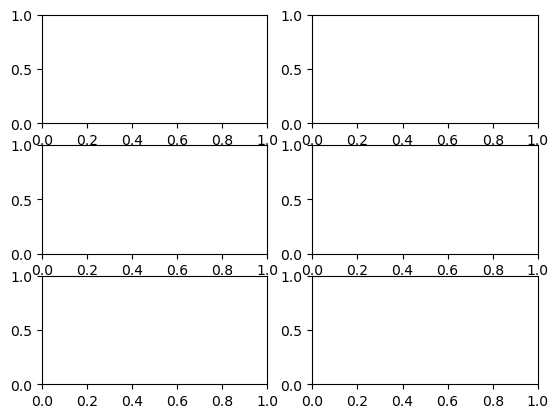

In [5]:
fig, ax = plt.subplots(3,2)
# fig.add_subplot(121)
# fig.add_subplot(221)

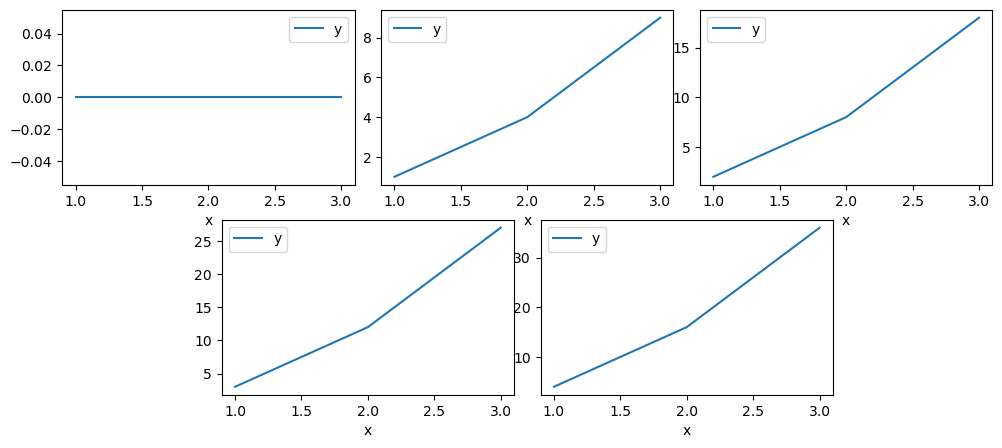

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 6)

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 11:2 * i + 2 - 11])
    data = [[1, i * 1], [2, i * 2 * 2], [3, i * 3 * 3]]
    df = pd.DataFrame(data, columns=['x', 'y'])

    df.plot('x', 'y', ax=ax)

# plt.tight_layo